In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import json 
import os

In [ ]:
def read_all_json(folder_path, state_name):
    df = pd.DataFrame()
    for file in os.listdir(folder_path):
        file_path = f"{folder_path}/{file}"
        f = open(file_path, encoding="utf8")
        data = json.load(f)
        df_1 = pd.json_normalize(data, max_level=2)
        df_1 = df_1.drop(['documentos'], axis=1, errors='ignore')
        df_2 = pd.json_normalize(data, record_path=['tipoSancion'], record_prefix='tipoSancion.')
        df_3 = df_1.join(df_2)
        df_3['estado'] = state_name
        df = pd.concat([df, df_3])
    return df

In [ ]:
def name_clean(df):
  df['servidorPublicoSancionado.nombreCompleto'] = df['servidorPublicoSancionado.nombres'] + ' ' + df['servidorPublicoSancionado.primerApellido'] + ' ' + df['servidorPublicoSancionado.segundoApellido']
  df = df.drop(['servidorPublicoSancionado.nombres', 'servidorPublicoSancionado.primerApellido', 'servidorPublicoSancionado.segundoApellido'], axis=1)
  df = df.drop(['expediente', 'resolucion.url', 'servidorPublicoSancionado.genero.valor', 
                        'multa.moneda.valor', 'tipoSancion.valor', 'tipoSancion._id', '__v'], axis=1, errors='ignore')
  return df

In [ ]:
chiapas = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/CHIAPAS', 'CHIAPAS')
chiapas.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,servidorPublicoSancionado.nombres,...,resolucion.fechaResolucion,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,estado
0,b411f02b-5ea7-489e-93e5-9eca24d090f6,2022-05-06T00:00:00Z,CA/012/2022,DATOS NO PROPORCIONADOS,"[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,Fiscalia General del Estado,FGE,78,ANDRES,...,2022-01-12,0,MXN,PESO MEXICANO,3 MESES,2022-02-15,2022-05-15,I,INHABILITADO,CHIAPAS


In [ ]:
chiapas.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'institucionDependencia.nombre',
       'institucionDependencia.siglas', 'institucionDependencia.clave',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.nivel',
       'tipoFalta.clave', 'tipoFalta.valor', 'resolucion.url',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

In [ ]:
chiapas = name_clean(chiapas)

In [ ]:
chiapas.shape

(27, 22)

In [ ]:
durango = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/DURANGO', 'DURANGO')
durango.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,institucionDependencia.nombre,institucionDependencia.siglas,servidorPublicoSancionado.genero.clave,servidorPublicoSancionado.genero.valor,...,tipoFalta.valor,resolucion.url,resolucion.fechaResolucion,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,616ee08322b3267f3eae7d6a,2021-09-27T00:00:00Z,C.R.LXVIII.P.J.P.03/2021,CONGRESO DEL ESTADO DE DURANGO,"[{'clave': 'D', 'valor': 'DESTITUCIÓN', 'descr...","EJERCICIO INDEBIDO DE FUNCIONES PÚBLICAS, INFR...",COMISION DE RESPONSABILIDADES DEL CONGRESO DEL...,CRCED,M,MASCULINO,...,OBSTRUCCIÓN DE LA JUSTICIA,http://congresodurango.gob.mx/Archivos/LXVIII/...,2021-08-14,7 años,2021-08-14,2028-08-14,D,DESTITUCIÓN,DESTITUCIÓN,DURANGO


In [ ]:
durango.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'institucionDependencia.nombre',
       'institucionDependencia.siglas',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'resolucion.url', 'resolucion.fechaResolucion',
       'inhabilitacion.plazo', 'inhabilitacion.fechaInicial',
       'inhabilitacion.fechaFinal', 'tipoSancion.clave', 'tipoSancion.valor',
       'tipoSancion.descripcion', 'estado'],
      dtype='object')

In [ ]:
durango = name_clean(durango)

In [ ]:
durango.shape

(1, 19)

In [ ]:
edomex = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/EDOMEX', 'EDOMEX')
edomex.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,observaciones,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,...,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,62b5d493a069d2c71acd3b7e,2020-11-09T10:19:56Z,10/2019,NOVENA SALA ESPECIALIZADA EN MATERIA DE RESPON...,"[{'clave': 'I', 'valor': 'INHABILITADO', 'desc...","COHECHO,","EMPLEO, CARGO O COMISIÓN AL MOMENTO DE LA REAL...",FISCALÍA GENERAL DE JUSTICIA DEL ESTADO DE MÉXICO,FGJEM,oau-002,...,0.0,MXN,PESO MEXICANO,0 día(s) 4 mes(es) 4 año(s),NaN,NaN,I,INHABILITADO,INHABILITADO,EDOMEX


In [ ]:
edomex.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'observaciones',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'institucionDependencia.clave', 'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoFalta.descripcion', 'resolucion.url',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'tipoSancion.descripcion',
       'estado'],
      dtype='object')

In [ ]:
edomex = name_clean(edomex)

In [ ]:
edomex.shape

(96, 24)

In [ ]:
edomex_2 = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3p/EDOMEX', 'EDOMEX')
edomex_2.head(1)

,id,fechaCaptura,expediente,objetoContrato,autoridadSancionadora,tipoFalta,tipoSancion,causaMotivoHechos,acto,observaciones,...,resolucion.sentido,resolucion.url,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,622799f073ed865c36ba7cd5,2020-11-09T11:30:55Z,07/2018,,OCTAVA SALA ESPECIALIZADA EN MATERIA DE RESPON...,ADMINISTRATIVA GRAVE,"[{'clave': 'SE', 'valor': 'SANCIÓN ECONÓMICA',...","UTILIZACIÓN DE INFORMACIÓN FALSA,",,,...,,https://trijaem.gob.mx/sentencias,7549.0,MXN,Peso Mexicano,NaN,SE,SANCIÓN ECONÓMICA,SANCIÓN ECONÓMICA,EDOMEX


In [ ]:
edomex_2.columns

Index(['id', 'fechaCaptura', 'expediente', 'objetoContrato',
       'autoridadSancionadora', 'tipoFalta', 'tipoSancion',
       'causaMotivoHechos', 'acto', 'observaciones',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'institucionDependencia.clave',
       'particularSancionado.nombreRazonSocial',
       'particularSancionado.objetoSocial', 'particularSancionado.tipoPersona',
       'responsableSancion.nombres', 'responsableSancion.primerApellido',
       'responsableSancion.segundoApellido', 'resolucion.sentido',
       'resolucion.url', 'multa.monto', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.plazo', 'tipoSancion.clave',
       'tipoSancion.valor', 'tipoSancion.descripcion', 'estado'],
      dtype='object')

In [ ]:
edomex_2 = edomex_2.drop(['expediente', 'resolucion.url', 'servidorPublicoSancionado.genero.valor', 
                        'multa.moneda.valor', 'tipoSancion.valor'], axis=1, errors='ignore')

In [ ]:
edomex_2.rename(columns={'particularSancionado.nombreRazonSocial': 'servidorPublicoSancionado.nombreCompleto'}, inplace=True)

In [ ]:
edomex_2 = edomex_2.drop(['particularSancionado.objetoSocial', 'particularSancionado.tipoPersona', 
                          'responsableSancion.nombres', 'responsableSancion.primerApellido',
                        'responsableSancion.segundoApellido', 'resolucion.sentido'], axis=1, errors='ignore')

In [ ]:
edomex_2.shape

(4, 19)

In [ ]:
jalisco = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/JALISCO', 'JALISCO')
jalisco.head(1)

,id,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,observaciones,fechaCaptura,__v,institucionDependencia.nombre,institucionDependencia.clave,...,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,multa.moneda.clave,multa.moneda.valor,multa.monto,tipoSancion._id,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,63175e5de8496b23104a01c1,106/2021-A,Contraloría del Estado,"[{'_id': '63175e5de8496b23104a01c2', 'clave': ...",Incumplimiento en Declaración de Situación Pat...,None,2022-09-06T14:51:09.884Z,0,O.P.D Hospital Civil de Guadalajara,,...,NaN,NaN,NaN,NaN,NaN,63175e5de8496b23104a01c2,AS,ABSTENCION DE SANCION,None,JALISCO


In [ ]:
jalisco.columns

Index(['id', 'expediente', 'autoridadSancionadora', 'tipoSancion',
       'causaMotivoHechos', 'observaciones', 'fechaCaptura', '__v',
       'institucionDependencia.nombre', 'institucionDependencia.clave',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.nivel',
       'tipoFalta.clave', 'tipoFalta.valor', 'tipoFalta.descripcion',
       'resolucion.fechaResolucion', 'institucionDependencia.siglas',
       'inhabilitacion.plazo', 'inhabilitacion.fechaInicial',
       'inhabilitacion.fechaFinal', 'multa.moneda.clave', 'multa.moneda.valor',
       'multa.monto', 'tipoSancion._id', 'tipoSancion.clave',
       'tipoSancion.valor', 'tipoSancion.descripcion', 'estado'],
      dtype='object')

In [ ]:
jalisco = name_clean(jalisco)

In [ ]:
jalisco.shape

(730, 24)

In [ ]:
michoacan = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/MICHOACAN', 'MICHOACAN')
michoacan.head(3)

,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,id,observaciones,tipoSancion,inhabilitacion.fechaFinal,inhabilitacion.fechaInicial,inhabilitacion.plazo,...,servidorPublicoSancionado.nombres,servidorPublicoSancionado.primerApellido,servidorPublicoSancionado.puesto,servidorPublicoSancionado.rfc,servidorPublicoSancionado.segundoApellido,tipoFalta.clave,tipoFalta.valor,tipoSancion.clave,tipoSancion.valor,estado
0,CONTRALORÍA MUNICIPAL,EJECUTÓ OBRAS EN HORARIO LABORAL Y OBTUVO UN B...,CM/PRA/01/06/2019,2022-05-26T09:38:39.490142,BAX8PIW7,,"[{'clave': 'I', 'valor': 'INHABILITADO'}]",2022-06-15,2021-06-15,1 AÑO,...,JESÚS,INFANTE,AUXILIAR ADMINISTRATIVO,IASJ820326UB4,SALAZAR,ANG,ADMINISTRATIVA NO GRAVE,I,INHABILITADO,MICHOACAN
1,CONTRALORIA MUNICIPAL,POR NO PRESENTAR EN TIEMPO Y FORMA LA DECLARAC...,006/2022,2022-10-07T09:27:28.172543,BEB2MEV6,NINGUNA OBSERVACION,"[{'clave': 'I', 'valor': 'INHABILITADO'}, {'cl...",2022-07-23,2022-07-22,UN DIA,...,J GUADALUPE,CHAVEZ,JARDINERO,CARJ6912123T0,RODRIGUEZ,OTRO,OTRO,I,INHABILITADO,MICHOACAN
2,CONTRALORIA MUNICIPAL,OMISION EN LA PRESENTACION DE LA DECLARACION D...,HALC/CONT/JS/PRA/012/2020,2022-02-28T12:27:55.950392,BOZ7JUV7,"SOLO SE APLICO INHABILITACION, NO MULTA","[{'clave': 'I', 'valor': 'INHABILITADO'}]",2022-07-15,2021-07-15,01 UN AÑO,...,ISAIAS,JACINTO,DIRECTOR DE SERVICIOS PUBLICOS MUNICIPALES,JAFI9008309Y4,FLORES,IDSP,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,S,"SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN",MICHOACAN


In [ ]:
michoacan.columns

Index(['autoridadSancionadora', 'causaMotivoHechos', 'expediente',
       'fechaCaptura', 'id', 'observaciones', 'tipoSancion',
       'inhabilitacion.fechaFinal', 'inhabilitacion.fechaInicial',
       'inhabilitacion.plazo', 'institucionDependencia.clave',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'multa.moneda.clave', 'multa.moneda.valor', 'multa.monto',
       'resolucion.fechaResolucion', 'resolucion.url',
       'servidorPublicoSancionado.curp',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.nivel', 'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.rfc',
       'servidorPublicoSancionado.segundoApellido', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

In [ ]:
michoacan = name_clean(michoacan)

In [ ]:
michoacan = michoacan.drop(['expediente', 'resolucion.url', 'servidorPublicoSancionado.genero.valor', 
                        'multa.moneda.valor', 'tipoSancion.valor'], axis=1, errors='ignore')

In [ ]:
michoacan.shape

(36, 25)

In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/MICHOACAN/data-0000000001.json' , encoding="utf8")
data = json.load(f)
df_mc_sanciones = pd.DataFrame(pd.json_normalize(data, record_path=['tipoSancion'], meta=[['servidorPublicoSancionado','curp']])['servidorPublicoSancionado.curp'].value_counts()).reset_index()

In [ ]:
df_mc_sanciones.rename(columns={"index": "servidorPublicoSancionado.curp", "servidorPublicoSancionado.curp": "numeroSanciones"}, inplace=True)
df_mc_sanciones

,servidorPublicoSancionado.curp,numeroSanciones
0,GOCA620305HMNNMR02,4
1,POPM540116HMNLRR06,4
2,GOCF970309HMNNRR00,4
3,VACL720521HMNRHN04,3
4,CEAM710907HMNBNG00,3
5,PETA670404HMNRRL06,3
6,ROTG670801MMNBRD05,3
7,MAAB600710HMNRGN15,3
8,AUMS780112HMNGRR01,3
9,AITC770504MMNVRT04,3


In [ ]:
michoacan = michoacan.merge(df_mc_sanciones, on='servidorPublicoSancionado.curp')

In [ ]:
puebla = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/PUEBLA', 'PUEBLA')
puebla.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,observaciones,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,...,resolucion.fechaResolucion,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,estado
0,3738,2019-12-26T05:22:51Z,169/2018,COMISIÓN DE DISCIPLINA DEL CONSEJO DE LA JUDIC...,"[{'clave': 'I', 'valor': 'INHABILITADO'}]",NEGLIGENCIA ADMINISTRATIVA,FALTAR AL DEBER DE PRESENTAR CON VERACIDAD DIV...,COMISION DE DISCIPLINA DEL CONSEJO DE LA JUDIC...,PJF,87,...,2019-09-24,0,MXN,Peso Mexicano,10 AÑOS,2019-11-01,2029-11-01,I,INHABILITADO,PUEBLA


In [ ]:
puebla.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'observaciones',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'institucionDependencia.clave', 'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.nivel',
       'tipoFalta.clave', 'tipoFalta.valor', 'resolucion.url',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

In [ ]:
puebla = name_clean(puebla)

In [ ]:
puebla.shape

(263, 23)

In [ ]:
quintana = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/QUINTANA ROO', 'QUINTANA ROO')
quintana.head(1)

,id,__v,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,tipoSancion,institucionDependencia.nombre,servidorPublicoSancionado.genero.clave,servidorPublicoSancionado.genero.valor,...,multa.monto,institucionDependencia.siglas,servidorPublicoSancionado.nivel,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,626b08bfb4d39600234713de,0,SEGUNDA SALA UNITARIA DEL TJAQROO,Realizó diversos cobros diciendo que eran dona...,01/2021-SU2-PR,2022-07-15T18:28:38+00:00,"[{'clave': 'SE', 'valor': 'SANCIÓN ECONÓMICA',...",Municipio de Solidaridad Quintana Roo,M,MASCULINO,...,15000.0,NaN,NaN,NaN,NaN,NaN,SE,SANCIÓN ECONÓMICA,"sanción económica por 15,000.00 (Son Quince Mi...",QUINTANA ROO


In [ ]:
quintana.columns

Index(['id', '__v', 'autoridadSancionadora', 'causaMotivoHechos', 'expediente',
       'fechaCaptura', 'tipoSancion', 'institucionDependencia.nombre',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.rfc', 'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoFalta.descripcion',
       'resolucion.fechaResolucion', 'multa.moneda.clave',
       'multa.moneda.valor', 'multa.monto', 'institucionDependencia.siglas',
       'servidorPublicoSancionado.nivel', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'tipoSancion.descripcion',
       'estado'],
      dtype='object')

In [ ]:
quintana = name_clean(quintana)

In [ ]:
quintana.shape

(4, 24)

In [ ]:
quintana_2 = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3p/QUINTANA ROO', 'QUINTANA ROO')
quintana_2.head(1)

,id,__v,acto,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,tipoFalta,tipoSancion,institucionDependencia.nombre,...,responsableSancion.primerApellido,responsableSancion.segundoApellido,resolucion.sentido,multa.moneda.clave,multa.moneda.valor,multa.monto,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,61e1db512a16a00013957b07,0,SOBORNO,TERCERA SALA UNITARIA DEL TJAQROO,UN CONOCIDO DEL PARTICULAR FUE DETENIDO Y PUES...,TJA/QR-SU3-092-2019,2022-07-15T18:32:17+00:00,ABUSO DE FUNCIONES,"[{'clave': 'SE', 'valor': 'SANCIÓN ECONÓMICA',...",DIRECCIÓN DE JUZGADOS CIVICOS DE BENITO JUÁREZ,...,IBARRA,GUEVARA,SE DETERMINA RESPONSABILIDAD CLASIFICADA COMO ...,MXN,PESO MEXICANO,8688,SE,SANCIÓN ECONÓMICA,"SANCIÓN ECONÓMICA POR LA CANTIDAD DE 8,688.00",QUINTANA ROO


In [ ]:
quintana_2.columns

Index(['id', '__v', 'acto', 'autoridadSancionadora', 'causaMotivoHechos',
       'expediente', 'fechaCaptura', 'tipoFalta', 'tipoSancion',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'particularSancionado.domicilioMexico.pais',
       'particularSancionado.domicilioMexico.entidadFederativa',
       'particularSancionado.domicilioMexico.municipio',
       'particularSancionado.domicilioMexico.localidad',
       'particularSancionado.domicilioMexico.vialidad',
       'particularSancionado.domicilioMexico.codigoPostal',
       'particularSancionado.nombreRazonSocial',
       'particularSancionado.tipoPersona', 'responsableSancion.nombres',
       'responsableSancion.primerApellido',
       'responsableSancion.segundoApellido', 'resolucion.sentido',
       'multa.moneda.clave', 'multa.moneda.valor', 'multa.monto',
       'tipoSancion.clave', 'tipoSancion.valor', 'tipoSancion.descripcion',
       'estado'],
      dtype='object')

In [ ]:
quintana_2.rename(columns={'particularSancionado.nombreRazonSocial': 'servidorPublicoSancionado.nombreCompleto'}, inplace=True)

In [ ]:
quintana_2 = quintana_2.drop(['__v', 'expediente', 'particularSancionado.domicilioMexico.pais', 
                        'particularSancionado.domicilioMexico.entidadFederativa', 
                        'particularSancionado.domicilioMexico.municipio',
                        'particularSancionado.domicilioMexico.localidad',
                        'particularSancionado.domicilioMexico.vialidad',
                        'particularSancionado.domicilioMexico.codigoPostal',
                        'tipoSancion.valor', 'multa.moneda.valor'], axis=1, errors='ignore')

In [ ]:
quintana_2 = quintana_2.drop(['particularSancionado.objetoSocial', 'particularSancionado.tipoPersona', 
                          'responsableSancion.nombres', 'responsableSancion.primerApellido',
                        'responsableSancion.segundoApellido', 'resolucion.sentido'], axis=1, errors='ignore')

In [ ]:
quintana_2.shape

(1, 15)

In [ ]:
sfp = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/SFP', 'SFP')
sfp.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,observaciones,institucionDependencia.nombre,institucionDependencia.siglas,servidorPublicoSancionado.nombres,...,tipoFalta.valor,resolucion.fechaResolucion,multa.moneda.clave,multa.moneda.valor,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,inhabilitacion.plazo,tipoSancion.clave,tipoSancion.valor,estado
0,630d3b3490bf7b1af7b62287,21/03/2019,P.A. 11/2008,CONGRESO ESTATAL,"[{'clave': 'I', 'valor': 'INHABILITADO'}]",NEGLIGENCIA ADMINISTRATIVA,POR 54 IRREGULARIDADES QUE FUERON CONTEMPLADAS...,GOBIERNO DEL ESTADO DE PUEBLA,,RIGOBERTO,...,Dato no proporcionado,07/06/2018,MXN,MXN,29/06/2018,29/06/2030,Dato no proporcionado,I,INHABILITADO,SFP


In [ ]:
sfp.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'observaciones',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'resolucion.fechaResolucion', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.fechaInicial',
       'inhabilitacion.fechaFinal', 'inhabilitacion.plazo',
       'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

In [ ]:
sfp = name_clean(sfp)

In [ ]:
sfp.shape

(3000, 19)

In [ ]:
sfp_2 = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3p/SFP', 'SFP')
sfp_2.head(1)

,id,fechaCaptura,expediente,objetoContrato,autoridadSancionadora,tipoFalta,tipoSancion,causaMotivoHechos,acto,observaciones,...,resolucion.fechaNotificacion,multa.moneda.clave,multa.moneda.valor,multa.monto,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,estado
0,184740001/2019,2020-02-10,184740001/2019,Dato no proporcionado,INSTITUTO MEXICANO DEL PETROLEO,Dato no proporcionado,"[{'clave': 'M', 'valor': 'MULTA'}, {'clave': '...",HABER PRESENTADO UN DOCUMENTO DEL INSTITUTO ME...,Dato no proporcionado,Dato no proporcionado,...,Dato no proporcionado,MXN,Dato no proporcionado,105686.0,Dato no proporcionado,2020-02-11,2020-05-11,M,MULTA,SFP


In [ ]:
sfp_2.columns

Index(['id', 'fechaCaptura', 'expediente', 'objetoContrato',
       'autoridadSancionadora', 'tipoFalta', 'tipoSancion',
       'causaMotivoHechos', 'acto', 'observaciones',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'particularSancionado.nombreRazonSocial',
       'particularSancionado.objetoSocial', 'particularSancionado.tipoPersona',
       'responsableSancion.nombres', 'responsableSancion.primerApellido',
       'responsableSancion.segundoApellido', 'resolucion.sentido',
       'resolucion.url', 'resolucion.fechaNotificacion', 'multa.moneda.clave',
       'multa.moneda.valor', 'multa.monto', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

In [ ]:
sfp_2.rename(columns={'particularSancionado.nombreRazonSocial': 'servidorPublicoSancionado.nombreCompleto'}, inplace=True)

In [ ]:
sfp_2 = sfp_2.drop(['particularSancionado.objetoSocial', 'particularSancionado.tipoPersona', 
                          'responsableSancion.nombres', 'responsableSancion.primerApellido',
                        'responsableSancion.segundoApellido', 'resolucion.sentido', 'resolucion.url',
                    'expediente', 'tipoSancion.valor', 'multa.moneda.valor'], axis=1, errors='ignore')

In [ ]:
sfp_2.shape

(2142, 20)

In [ ]:
yucatan = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/YUCATAN', 'YUCATAN')
yucatan.head(1)

,id,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,fechaCaptura,__v,institucionDependencia.nombre,institucionDependencia.siglas,servidorPublicoSancionado.nombres,...,resolucion.fechaResolucion,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,institucionDependencia.clave,servidorPublicoSancionado.nivel,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,61ddd18fdb69a1001d7c264f,DNQR/012/2021,Secretaría de la Contraloría General,"[{'clave': 'S', 'valor': 'SUSPENSIÓN DEL EMPLE...",INCUMPLIMIENTO EN EL EJERCICIO DE SUS FUNCIONE...,2022-01-11T18:50:55+00:00,0,INSTITUTO DE SEGURIDAD SOCIAL DE LOS TRABAJADO...,ISSTEY,LUIS ENRIQUE,...,2021-11-26,3 MESES,2021-11-26,2022-02-26,NaN,NaN,S,"SUSPENSIÓN DEL EMPLEO, CARGO O COMISIÓN",SUSPENSIÓN TEMPORAL POR EL TÉRMINO DE 3 MESES,YUCATAN


In [ ]:
yucatan.columns

Index(['id', 'expediente', 'autoridadSancionadora', 'tipoSancion',
       'causaMotivoHechos', 'fechaCaptura', '__v',
       'institucionDependencia.nombre', 'institucionDependencia.siglas',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoFalta.descripcion',
       'resolucion.fechaResolucion', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'institucionDependencia.clave', 'servidorPublicoSancionado.nivel',
       'tipoSancion.clave', 'tipoSancion.valor', 'tipoSancion.descripcion',
       'estado'],
      dtype='object')

In [ ]:
yucatan = name_clean(yucatan)

In [ ]:
yucatan.shape

(4, 21)

In [ ]:
df_final = pd.concat([chiapas, durango, edomex, edomex_2, jalisco, michoacan, 
                      puebla, quintana, quintana_2,sfp, sfp_2, yucatan], sort=False)

In [ ]:
df_final.shape

(6308, 32)

In [ ]:
df_final.columns

Index(['id', 'fechaCaptura', 'autoridadSancionadora', 'tipoSancion',
       'causaMotivoHechos', 'institucionDependencia.nombre',
       'institucionDependencia.siglas', 'institucionDependencia.clave',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.nivel',
       'tipoFalta.clave', 'tipoFalta.valor', 'resolucion.fechaResolucion',
       'multa.monto', 'multa.moneda.clave', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'estado',
       'servidorPublicoSancionado.nombreCompleto', 'tipoSancion.descripcion',
       'observaciones', 'tipoFalta.descripcion', 'objetoContrato', 'tipoFalta',
       'acto', 'servidorPublicoSancionado.curp',
       'servidorPublicoSancionado.rfc', 'numeroSanciones',
       'resolucion.fechaNotificacion'],
      dtype='object')

In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/dataton_2022/S3.csv', encoding='utf-8', index=False)

In [ ]:
import missingno

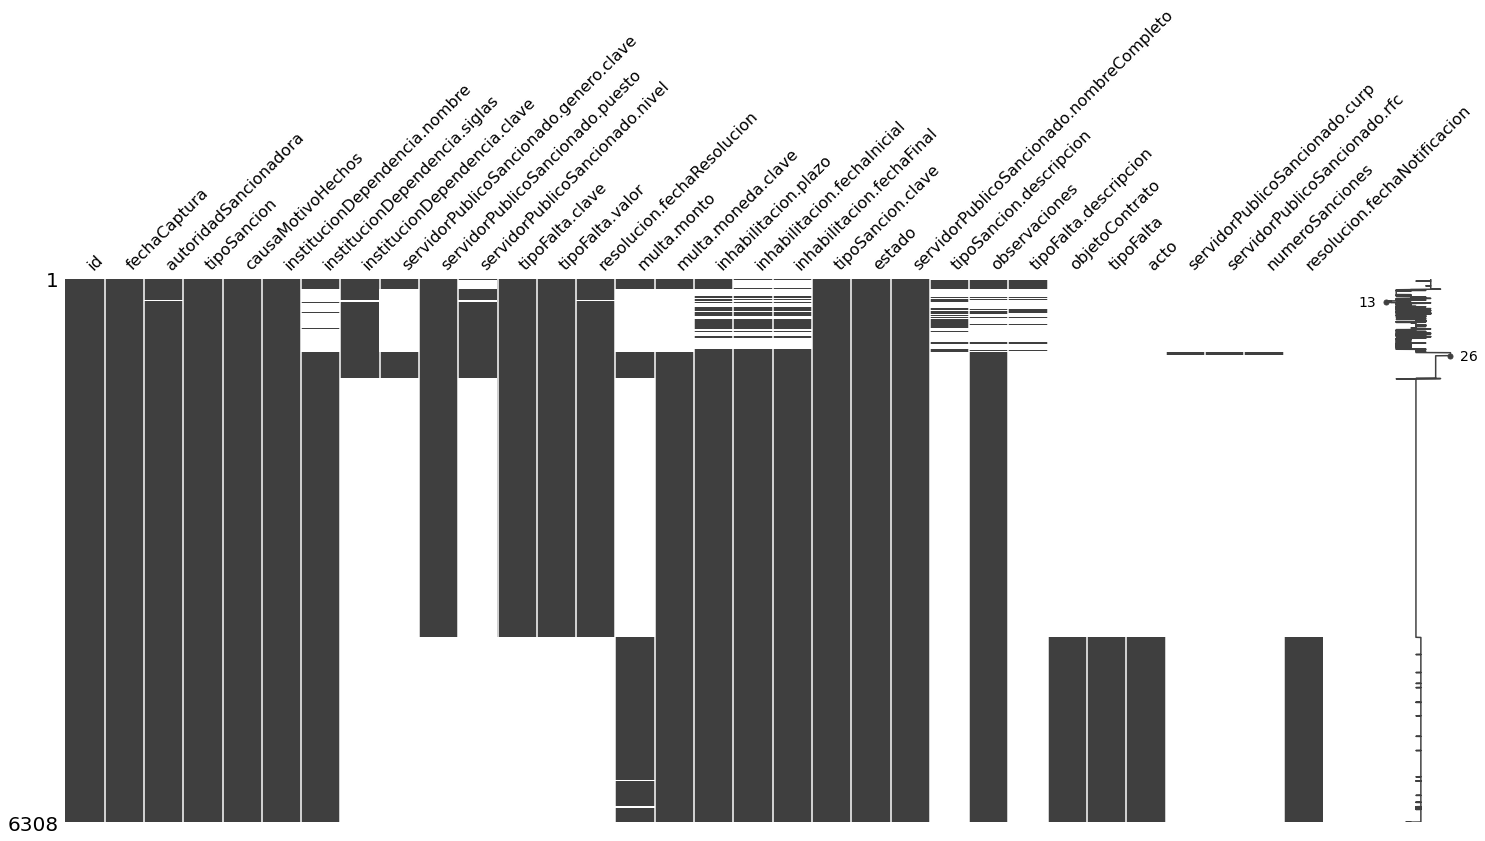

In [ ]:
missingno.matrix(df_final)

In [ ]:
df_final['acto'].value_counts()

Dato no proporcionado    2142
                            4
SOBORNO                     1
Name: acto, dtype: int64

In [ ]:
df_final['tipoFalta'].value_counts()

Dato no proporcionado    2142
ADMINISTRATIVA GRAVE        4
ABUSO DE FUNCIONES          1
Name: tipoFalta, dtype: int64

In [ ]:
df_final['objetoContrato'].value_counts()

Dato no proporcionado    2142
                            4
Name: objetoContrato, dtype: int64

In [ ]:
df_final['tipoFalta.valor'].value_counts()

Dato no proporcionado                                     3000
INCUMPLIMIENTO EN DECLARACION DE SITUACION PATRIMONIAL     460
ADMINISTRATIVA NO GRAVE                                    252
OTRO                                                       125
ADMINISTRATIVA GRAVE                                       102
VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL                 90
NEGLIGENCIA ADMINISTRATIVA                                  88
ABUSO DE AUTORIDAD                                          13
VIOLACION PROCEDIMIENTOS DE CONTRATACION                    13
ABUSO DE FUNCIONES                                           9
COHECHO O EXTORSION                                          5
OBSTRUCCIÓN DE LA JUSTICIA                                   2
VIOLACION A LOS DERECHOS HUMANOS                             1
DESVÍO DE RECURSOS PÚBLICOS                                  1
Name: tipoFalta.valor, dtype: int64

In [ ]:
df_final['estado'].value_counts()

SFP             5142
JALISCO          730
PUEBLA           263
EDOMEX           100
MICHOACAN         36
CHIAPAS           27
QUINTANA ROO       5
YUCATAN            4
DURANGO            1
Name: estado, dtype: int64

In [ ]:
df_final['autoridadSancionadora'].value_counts()

ORGANO INTERNO DE CONTROL                                                                       1612
CONTRALORIA DE ESTADO                                                                            674
INSTITUTO MEXICANO DEL SEGURO SOCIAL                                                             401
OIC Ayuntamiento de Tlajomulco de Zuñiga                                                         335
SECRETARIA DE LA FUNCI�N P�BLICA                                                                 281
                                                                                                ... 
PUEBLA                                                                                             1
JUEZ QUINTO PENAL DEL ESTADO DE PUEBLA                                                             1
CONSEJO NACIONAL DE EVALUACIONES DE LA POLITICA DE DESARROLLO SOCIAL                               1
INFOTEC CENTRO DE INVESTIGACI�N E INNOVACI�N EN TECNOLOG�AS DE LA INFORMACI�N Y COMUNICACI�

In [ ]:
df_final['institucionDependencia.nombre'].value_counts()

INSTITUTO MEXICANO DEL SEGURO SOCIAL                                                     401
Ayuntamiento de Tlajomulco                                                               336
SECRETARIA DE LA FUNCI�N P�BLICA                                                         281
GOBIERNO DEL ESTADO DE HIDALGO                                                           235
COMISION FEDERAL DE ELECTRICIDAD                                                         227
                                                                                        ... 
AYUNTAMIENTO DE SANTIAGO MIAHUATLAN, PUEBLA.                                               1
SEGUNDO TRIBUNAL UNITARIO DEL SEXTO CIRCUITO EN SAN ANDRES CHOLULA                         1
DELEGACIÓN DE LA PROCURADURÍA GENERAL DE LA REPÚBLICA EN EL ESTADO DE SAN LUIS POTOSÍ      1
AYUNTAMIENTO DE HUEYTLALPAN, PUEBLA                                                        1
Instituto para la Construcción y Conservación de Obra Pública en Yucat